**About Dataset**

This dataset contains comprehensive information on 2,392 high school students, detailing their demographics, study habits, parental involvement, extracurricular activities, and academic performance. The target variable, GradeClass, classifies students' grades into distinct categories, providing a robust dataset for educational research, predictive modelling, and statistical analysis. This dataset offers a comprehensive view of the factors influencing students' academic performance, making it ideal for educational research, development of predictive models, and statistical analysis.

# 1. Importing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy import stats
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_curve

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier, Pool, cv
from sklearn.naive_bayes import GaussianNB, MultinomialNB

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

2024-08-12 17:50:28.128138: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-12 17:50:28.128240: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-12 17:50:28.253371: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
df = pd.read_csv('/kaggle/input/students-performance-dataset/Student_performance_data _.csv')
df

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


There are no NAs in the DataFrame

In [4]:
df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [5]:
# Check whether there any duplicates or not
sum(df.duplicated())

0

- The dataset contains a total of 2392 observations
- All values in the dataset are non-null and numerical
- There are no duplicate records

# 2. Feature Distribution

array([[<Axes: title={'center': 'StudentID'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Ethnicity'}>],
       [<Axes: title={'center': 'ParentalEducation'}>,
        <Axes: title={'center': 'StudyTimeWeekly'}>,
        <Axes: title={'center': 'Absences'}>,
        <Axes: title={'center': 'Tutoring'}>],
       [<Axes: title={'center': 'ParentalSupport'}>,
        <Axes: title={'center': 'Extracurricular'}>,
        <Axes: title={'center': 'Sports'}>,
        <Axes: title={'center': 'Music'}>],
       [<Axes: title={'center': 'Volunteering'}>,
        <Axes: title={'center': 'GPA'}>,
        <Axes: title={'center': 'GradeClass'}>, <Axes: >]], dtype=object)

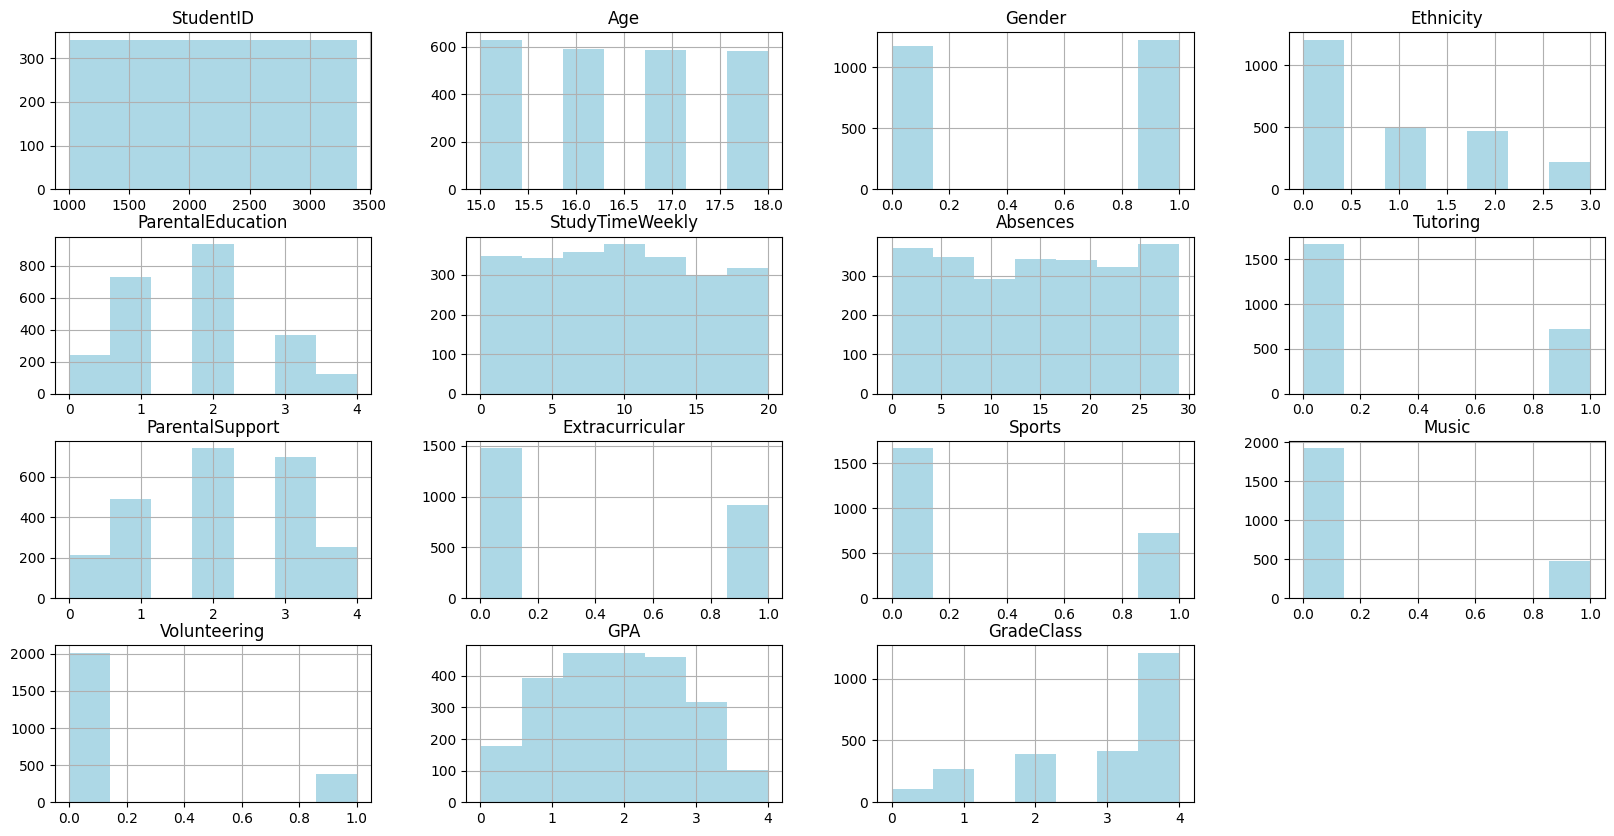

In [6]:
df.hist(figsize=(20,10), bins=7, color='lightblue')

- There is no significance of StudentID
- There are a lot of low-scoring students in the dataset (a majority of 4s - Fs in GradeClass

# 3. Categorical and Numerical Features

In [7]:
columns = list(df.columns)

categoric_columns = []
numeric_columns = []

for i in columns:
    if len(df[i].unique())>5:
        numeric_columns.append(i)
    else:
        categoric_columns.append(i)
        
# Assuming the first column is an ID or non-numeric feature
numeric_columns = numeric_columns[1:]

print('Numerical Features: ', numeric_columns)
print('Categorical Features: ', categoric_columns)

Numerical Features:  ['StudyTimeWeekly', 'Absences', 'GPA']
Categorical Features:  ['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GradeClass']


Age is considered a categorical feature here. The reason is it contains only high school students, so the age category here we have is very small

## 3.1 Distribution of Categrical Features

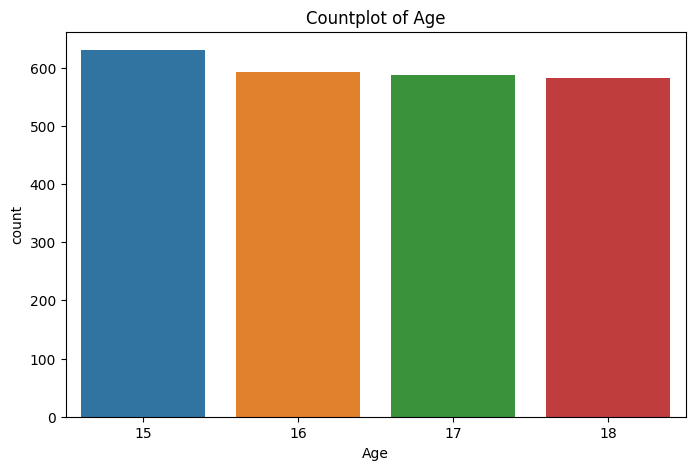

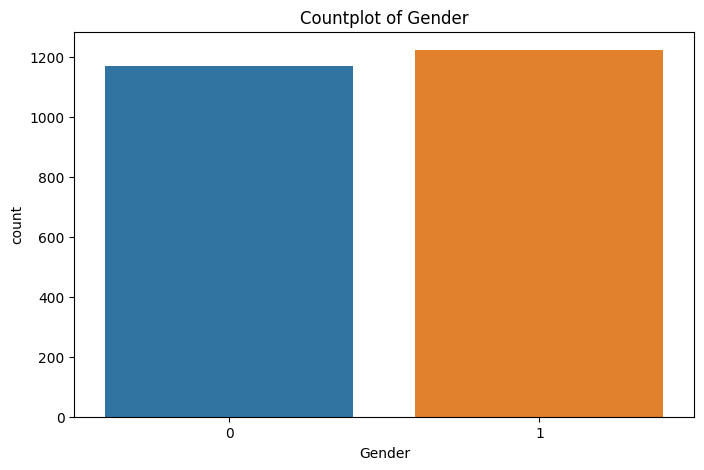

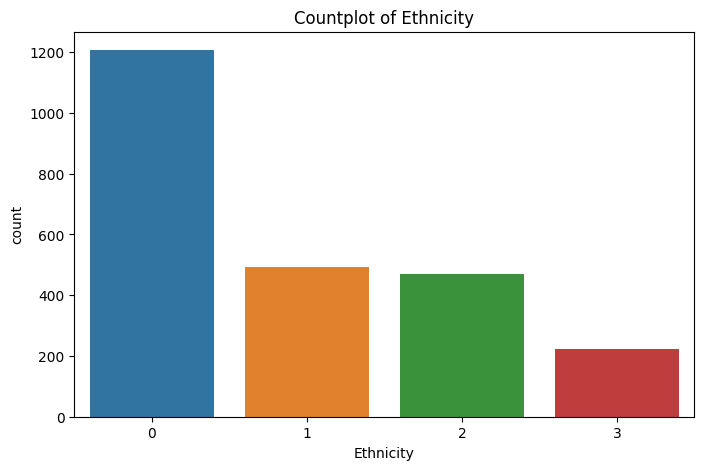

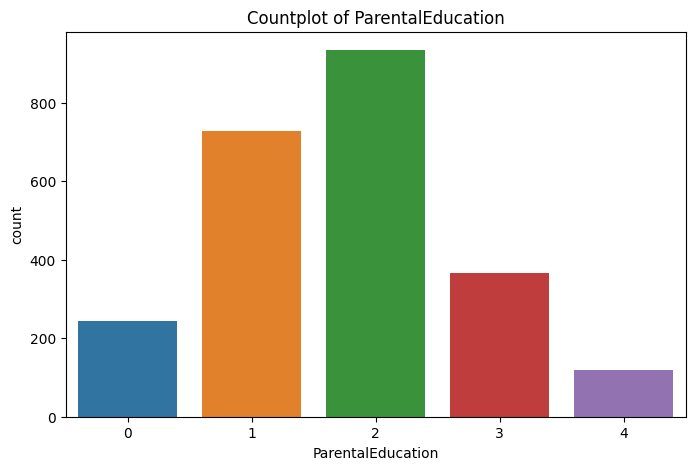

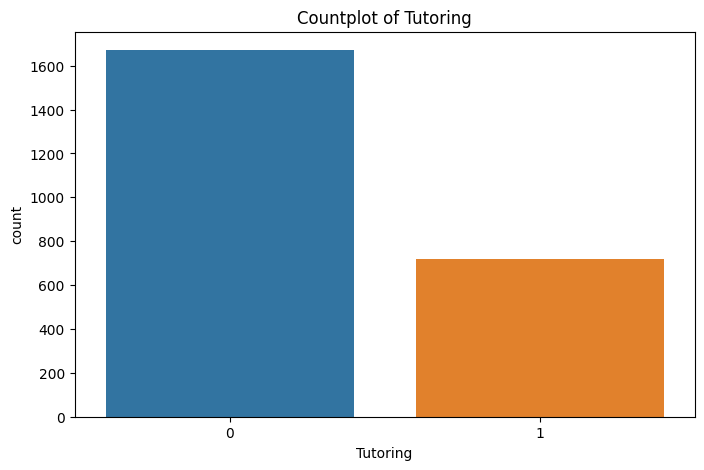

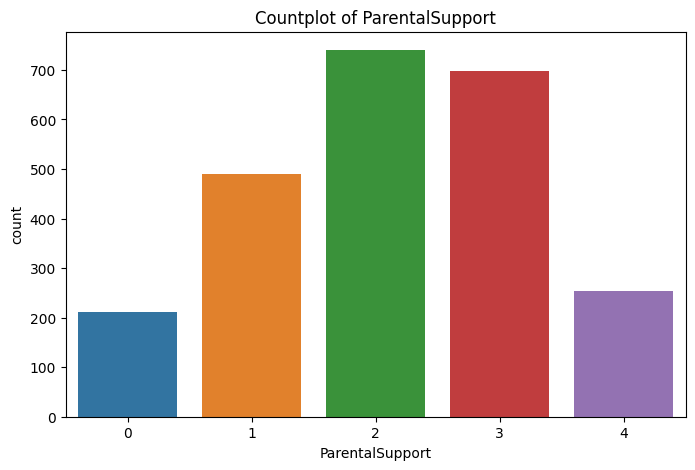

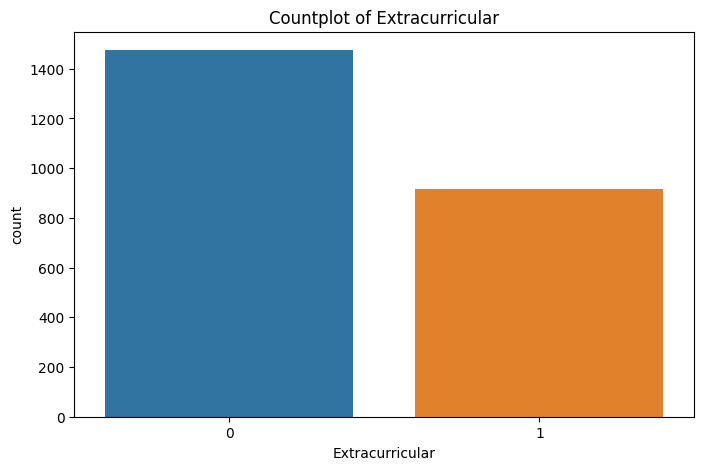

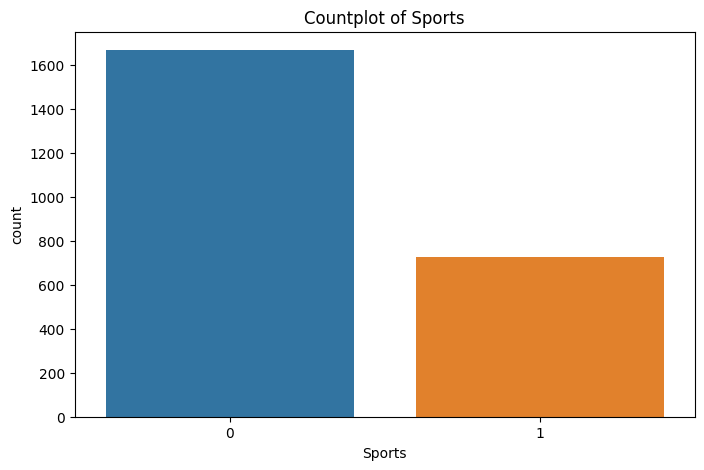

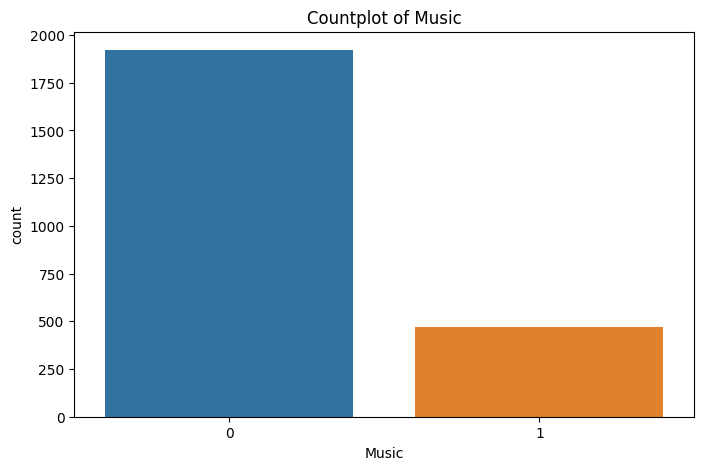

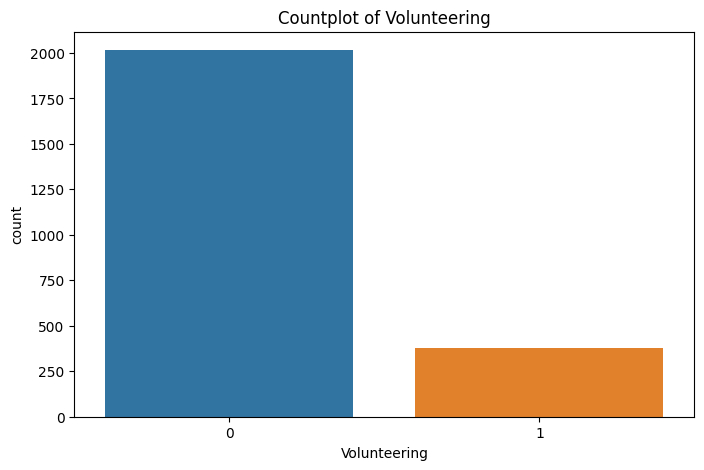

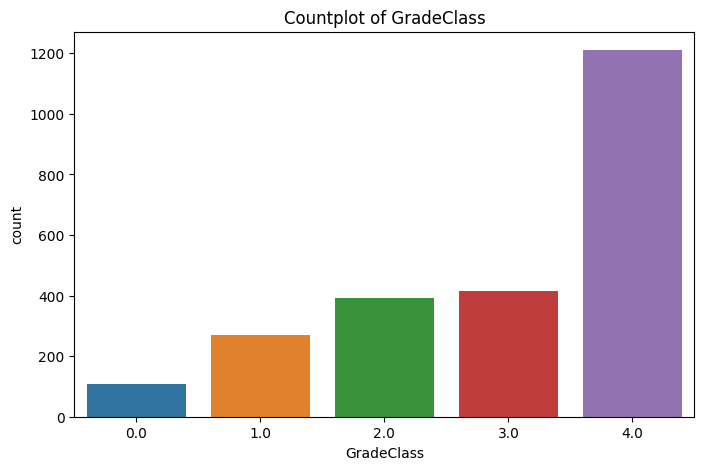

In [8]:
# Plot countplots for each categorical column
for column in categoric_columns:
    plt.figure(figsize=(8,5))
    sns.countplot(data=df, x=column)
    plt.title(f'Countplot of {column}')
#     plt.xticks(rotation=45) #Roatate x labels if they are too long
    plt.show()

- The age distribution is balanced, with almost equal representation of individuals aged 15 to 18.
- The most represented demographic is Caucasian(0)
- Notably, both females and males are equally represented across the dataset
- A high number of individuals do not participate in music, sports, tutoring, volunteering, or any other extracurricular activity.
- Most parents have some college education, followed by high school graduates and then those with bachelor's degrees.
- Parental support follows a normal distribution, with most parents providing moderate support.

## 3.2 Distribution of Numerical Features

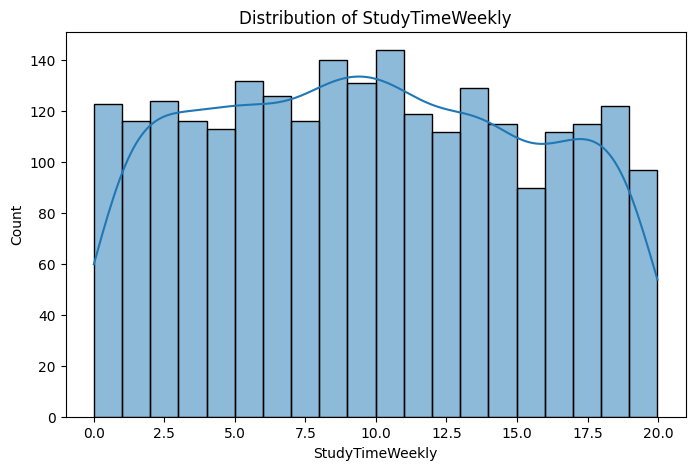

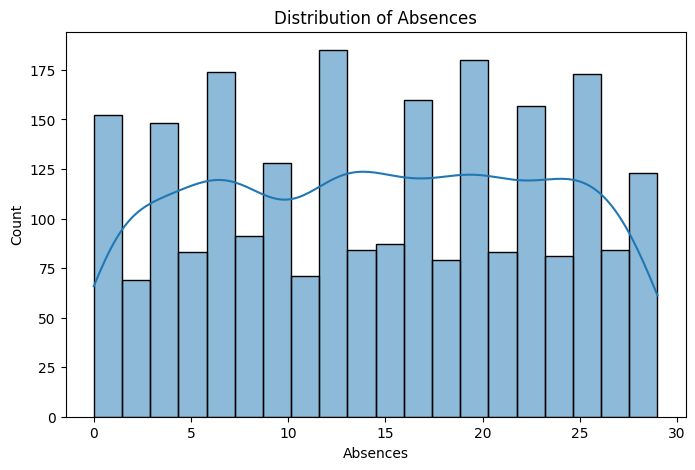

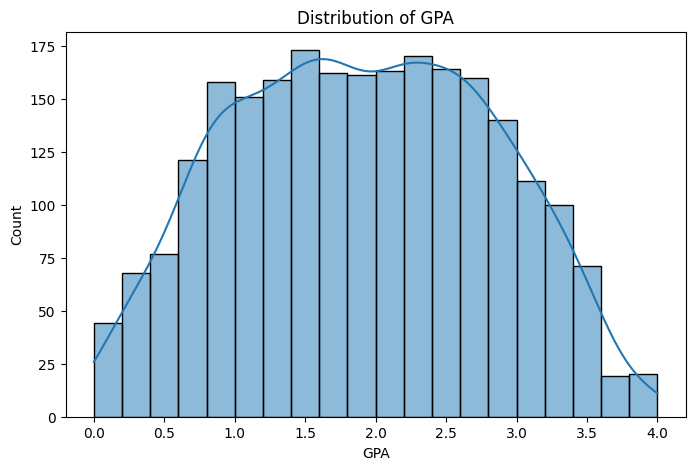

In [9]:
# Plot histogram for each numerical column
for column in numeric_columns:
    plt.figure(figsize=(8,5))
    sns.histplot(data=df, x=column, kde=True, bins=20)
    plt.title(f'Distribution of {column}')
    plt.show()

# 4. Encode Categorical and Numerical Features

Here, we are using LabelEncoder to encode the categorical features and StandardScaler to scale our numeric features

In [10]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical features
df = df.copy()
for column in df[categoric_columns]:
    df[column] = label_encoder.fit_transform(df[column])
    
# Standardize numerical features
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# 5. Exploring Correlations

## 5.1 Pearson correlation coefficient

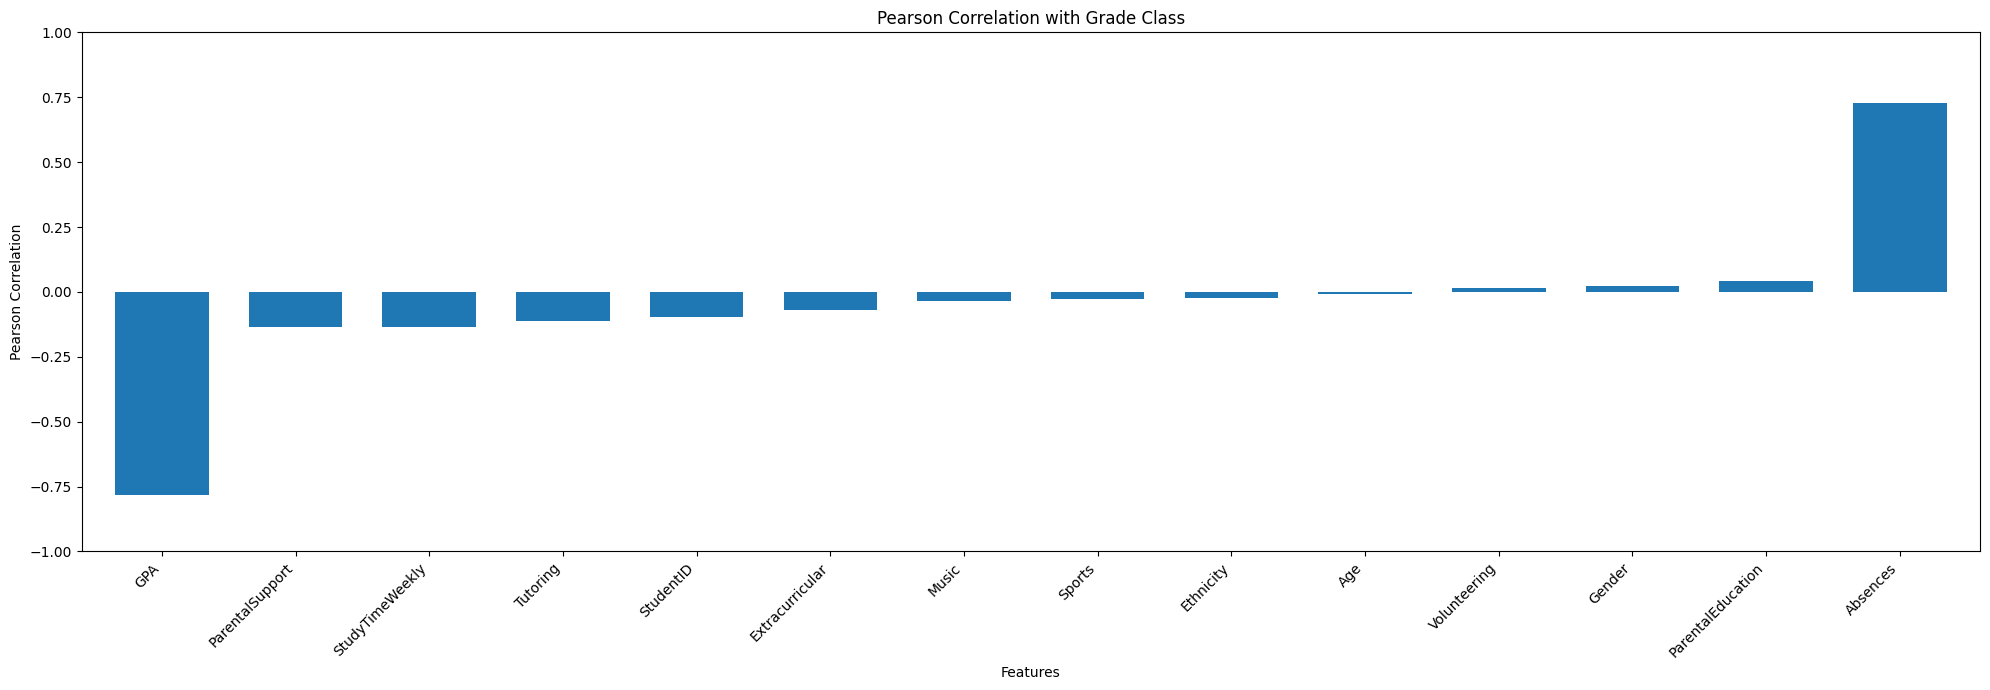

In [11]:
correlations = df.corr(numeric_only=True)['GradeClass'][:-1].sort_values()

# set the size of the figure
plt.figure(figsize=(20,7))

# Create a bar plot for the Pearson Correlation Coefficient
ax = correlations.plot(kind='bar', width=0.7)

# set the y-axis limits and labels
ax.set(ylim=[-1,1], ylabel='Pearson Correlation', xlabel='Features', title='Pearson Correlation with Grade Class')

# Rotate x-axis labels for better readability
ax.set_xticklabels(correlations.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

## 5.2 Heatmap

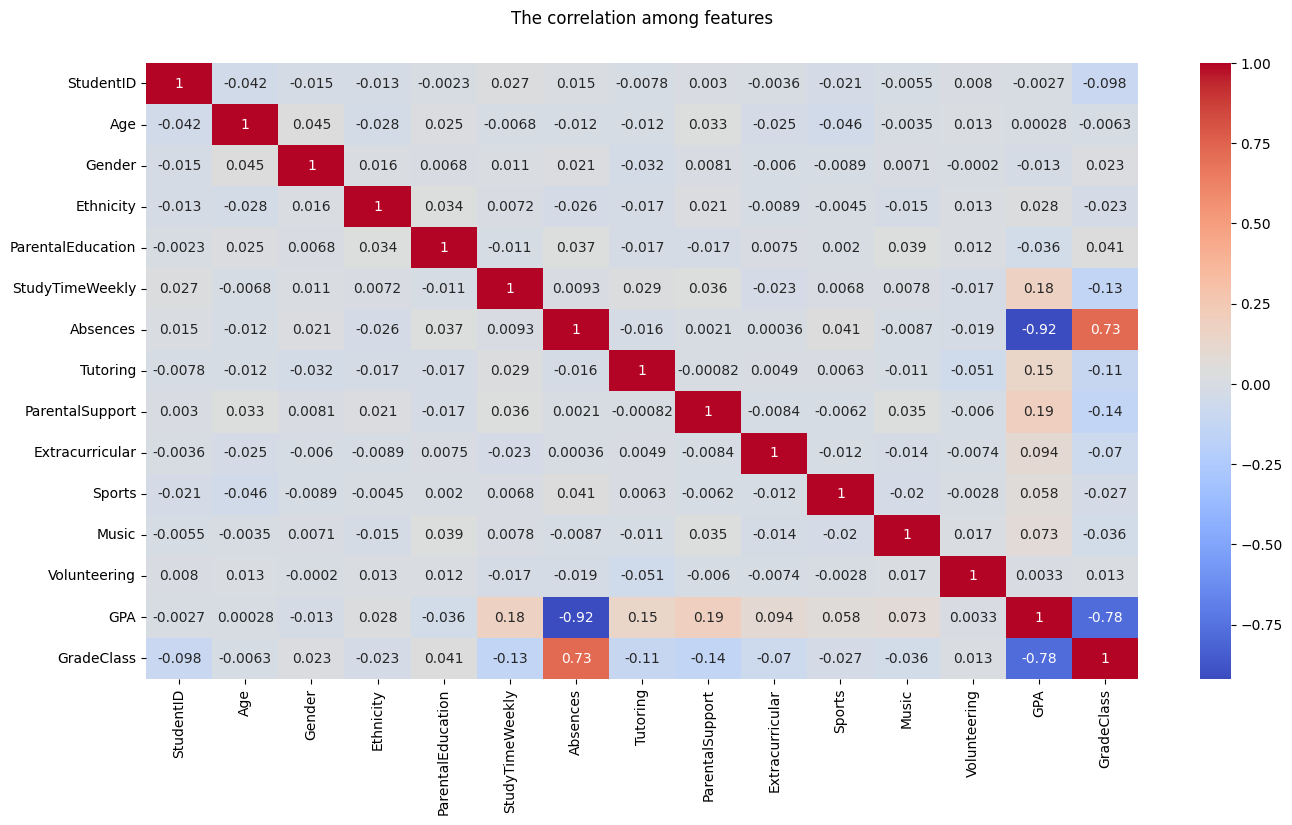

In [12]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title('The correlation among features', y=1.05)
plt.show()

We can  observe that the most correlated features to GradeClass are GPA and Absences. Here, GPA cannot be treated as a predictor in the dataset. So we will drop GPA.

**Find the strongest correlation**

In [13]:
grade_class_corr = df.corr(numeric_only=True)['GradeClass'].drop('GradeClass')
strongest_correlation = grade_class_corr.idxmax()
strongest_correlation_value = grade_class_corr.max()

print(f'The strongest correlation with the Grade Class is {strongest_correlation} with a value of {strongest_correlation_value:.2f}')

The strongest correlation with the Grade Class is Absences with a value of 0.73


## 5.3 ViolinPlot

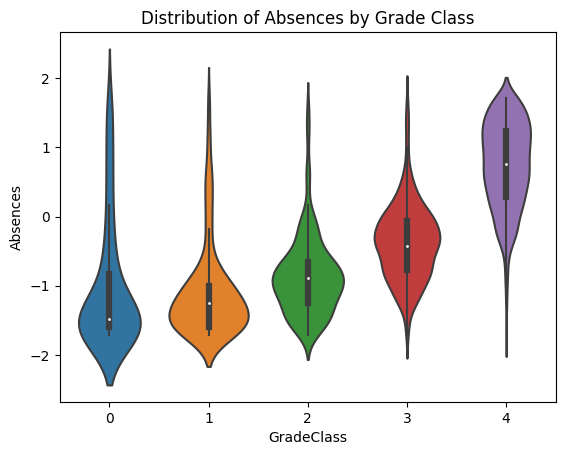

In [14]:
sns.violinplot(data=df, x='GradeClass', y='Absences')
plt.title(f'Distribution of Absences by Grade Class')
plt.show()

# 6. Exploring Outliers

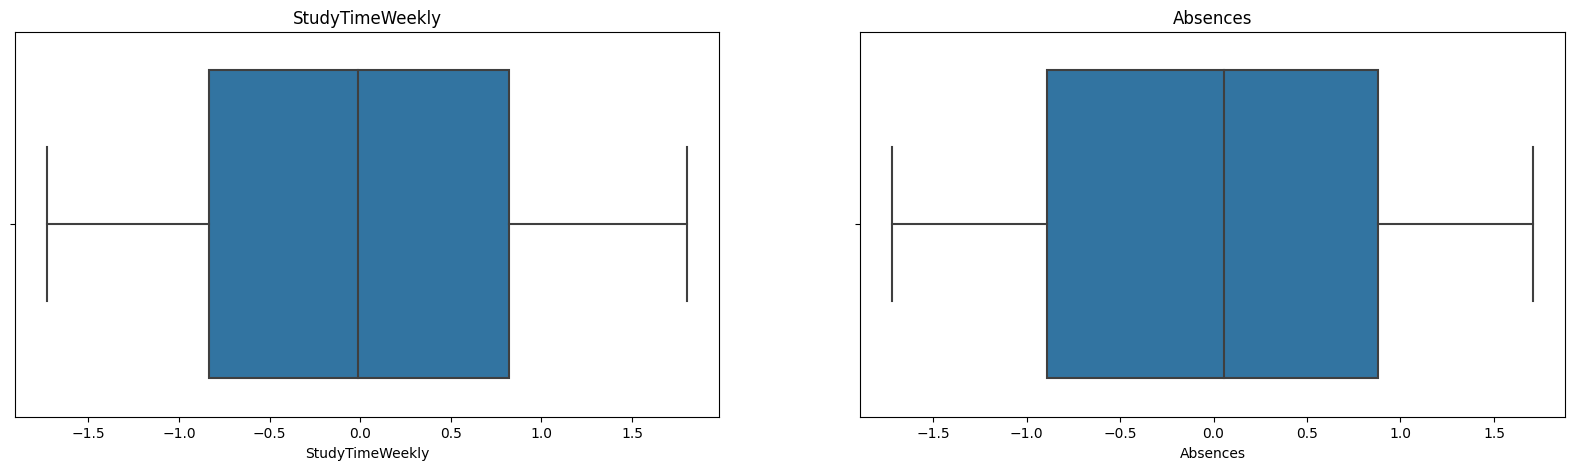

In [15]:
# Create a 1x2 subplot with a figure size of 20x5 inches
fig, ax = plt.subplots(1,2,figsize=(20,5))

# Loop through the first two numerical columns in the DataFrames
for idx in range(2):
    # Create a boxplot for each column
    sns.boxplot(ax=ax[idx], x=df[numeric_columns[idx]])
    ax[idx].set_title(numeric_columns[idx])

In [16]:
# Calculate the z-scores for the numerical columns in the DataFrame
z_scores = stats.zscore(df[numeric_columns])

# Generate descriptive statistics for the Z-scores and round the results to 3 decimal places
z_scores.describe().round(3)

,StudyTimeWeekly,Absences,GPA
count,2392.000,2392.000,2392.000
mean,-0.000,0.000,0.000
std,1.000,1.000,1.000
min,-1.729,-1.718,-2.083
25%,-0.837,-0.891,-0.799
50%,-0.012,0.054,-0.014
75%,0.820,0.881,0.783
max,1.806,1.708,2.288


There are no outliers in the dataset

# 7. Split the Dataset

In [17]:
# Here, we are taking target feature as 'GradeClass'
X = df.drop(columns=['GradeClass','GPA','StudentID','Age'])
y = df['GradeClass']

# Splitting the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 8. Model Selection

## 8.1 Feature Importance

In [18]:
clf = RandomForestClassifier(random_state=42)
clf = clf.fit(X,y)

fimp = pd.Series(data=clf.feature_importances_, index=X.columns).sort_values(ascending=False)

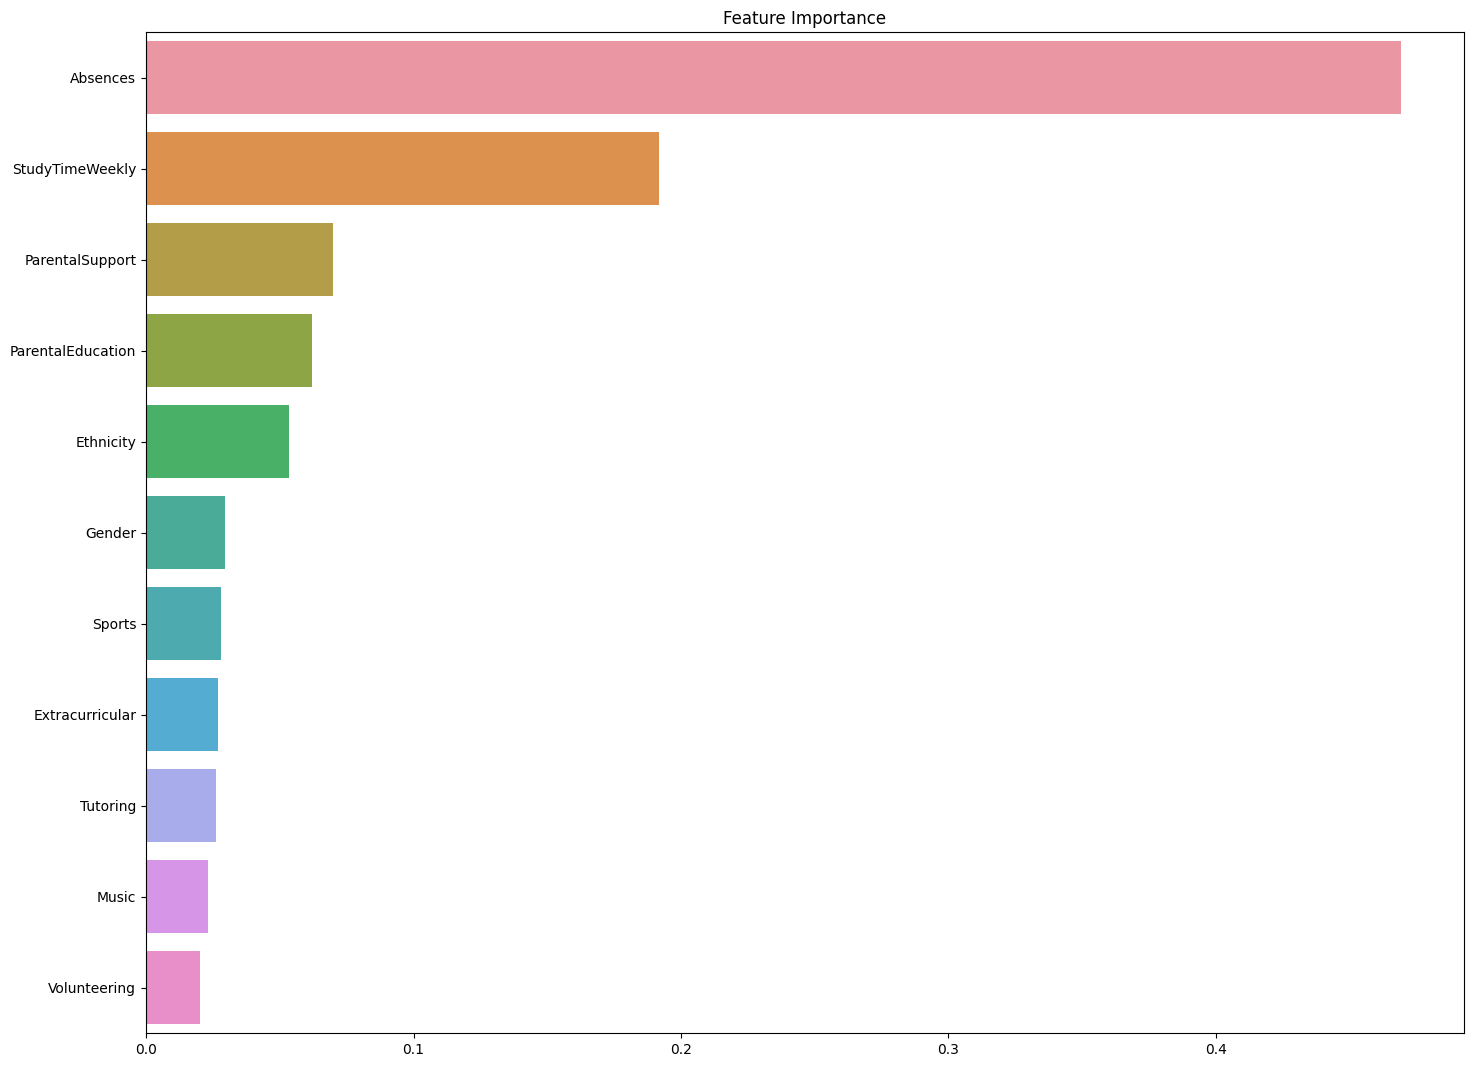

In [19]:
plt.figure(figsize=(17,13))
plt.title("Feature Importance")
ax = sns.barplot(y=fimp.index, x=fimp.values, orient='h')

## 8.2 Classification Models

In [20]:
classification_models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(),
    'CatBoost': CatBoostClassifier(silent=True),
}

model_names = []
accuracies = []

# Train and Evaluate the model
for name, clf in classification_models.items():
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    model_names.append(name)
    accuracies.append(score)
    print(f'{name} accuracy: {score:.2f}')
    
# Create a DataFrame for model accuracies
df_models = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies})

# Plot model accuracies using Plotly
fig = px.bar(df_models, x='Model', y='Accuracy', title='Model Accuracies')
fig.show()

Logistic Regression accuracy: 0.73
K-Nearest Neighbors accuracy: 0.65
Support Vector Machine accuracy: 0.75
Decision Tree accuracy: 0.57
Random Forest accuracy: 0.72
Gradient Boosting accuracy: 0.69
AdaBoost accuracy: 0.66
Gaussian Naive Bayes accuracy: 0.68
XGBoost accuracy: 0.67
CatBoost accuracy: 0.70


In [21]:
# Find the best model
best_index = accuracies.index(max(accuracies))
best_model_name = model_names[best_index]
best_model = classification_models[best_model_name]

print(f'The best model is: {best_model_name} with an accuracy of {accuracies[best_index]:.2f}')

The best model is: Support Vector Machine with an accuracy of 0.75


## 8.3 Using Neural Network

In [22]:
y_train_encoded = to_categorical(y_train, num_classes=5)
y_test_encoded = to_categorical(y_test, num_classes=5)

In [23]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
X_train_scaled.shape

(1913, 11)

In [25]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(11,)),
    Dense(96, activation='relu'),
#     Dense(96, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
#     Dense(64, activation='relu'),
#     Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(5, activation='softmax')
])

In [26]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
history=model.fit(X_train_scaled, y_train_encoded, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
26/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2513 - loss: 1.6108     

I0000 00:00:1723485061.693997      82 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


48/48 ━━━━━━━━━━━━━━━━━━━━ 14s 195ms/step - accuracy: 0.3338 - loss: 1.5895 - val_accuracy: 0.4909 - val_loss: 1.2817
Epoch 2/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5424 - loss: 1.1113 - val_accuracy: 0.6997 - val_loss: 0.8704
Epoch 3/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7293 - loss: 0.7990 - val_accuracy: 0.7311 - val_loss: 0.7679
Epoch 4/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7573 - loss: 0.7122 - val_accuracy: 0.7232 - val_loss: 0.7480
Epoch 5/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7634 - loss: 0.6878 - val_accuracy: 0.7206 - val_loss: 0.7486
Epoch 6/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7484 - loss: 0.7181 - val_accuracy: 0.7102 - val_loss: 0.7630
Epoch 7/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7868 - loss: 0.6474 - val_accuracy: 0.7520 - val_loss: 0.7147
Epoch 8/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7888 - loss: 0.5994 - val_accuracy: 0.7441 - val_loss: 0.7732


**Evaluate the model**

In [28]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_encoded)
print()
print(f'Test loss: {test_loss}, Test accuracy: {test_accuracy}')

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7204 - loss: 1.0030 

Test loss: 0.9291608929634094, Test accuracy: 0.7244259119033813


Neural Network gives better results than few algorithms

# 9. Evaluation

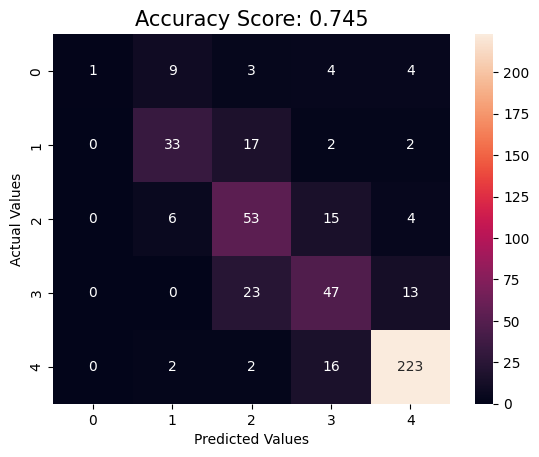

In [29]:
# Initialize and train model
best_model.fit(X_train, y_train)
model_score = best_model.score(X_test, y_test)
y_pred = best_model.predict(X_test)

# Calculate and plot the Confusion matrix
score = round(accuracy_score(y_test, y_pred), 3)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size=15)
plt.show()

# 10. Reducing Dimensionality

In [30]:
fimp.head(3)

Absences           0.469150
StudyTimeWeekly    0.191713
ParentalSupport    0.069698
dtype: float64

In [31]:
X_train = X_train[['Absences', 'StudyTimeWeekly', 'ParentalSupport']]
X_test = X_test[['Absences', 'StudyTimeWeekly', 'ParentalSupport']]

Let's see what happens when we use these as our predictors

In [32]:
classification_models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(),
    'CatBoost': CatBoostClassifier(silent=True),
}

model_names = []
accuracies = []

# Train and Evaluate the model
for name, clf in classification_models.items():
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    model_names.append(name)
    accuracies.append(score)
    print(f'{name} accuracy: {score:.2f}')
    
# Create a DataFrame for model accuracies
df_models = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies})

# Plot model accuracies using Plotly
fig = px.bar(df_models, x='Model', y='Accuracy', title='Model Accuracies')
fig.show()

Logistic Regression accuracy: 0.73
K-Nearest Neighbors accuracy: 0.69
Support Vector Machine accuracy: 0.72
Decision Tree accuracy: 0.58
Random Forest accuracy: 0.64
Gradient Boosting accuracy: 0.68
AdaBoost accuracy: 0.66
Gaussian Naive Bayes accuracy: 0.68
XGBoost accuracy: 0.63
CatBoost accuracy: 0.66


Here we can analyze that we are getting almost same values while using these three features only. That means, these features producing the main learning feature.

In [33]:
y_train_encoded = to_categorical(y_train, num_classes=5)
y_test_encoded = to_categorical(y_test, num_classes=5)

In [34]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
model1 = Sequential([
    Dense(128, activation='relu', input_shape=(3,)),
    Dense(96, activation='relu'),
#     Dense(96, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
#     Dense(64, activation='relu'),
#     Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(5, activation='softmax')
])

In [36]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
history=model1.fit(X_train_scaled, y_train_encoded, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 13s 188ms/step - accuracy: 0.5416 - loss: 1.3983 - val_accuracy: 0.6397 - val_loss: 0.9410
Epoch 2/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6344 - loss: 0.9537 - val_accuracy: 0.6710 - val_loss: 0.9100
Epoch 3/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6491 - loss: 0.8847 - val_accuracy: 0.6423 - val_loss: 0.9345
Epoch 4/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6773 - loss: 0.8386 - val_accuracy: 0.6971 - val_loss: 0.8570
Epoch 5/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6853 - loss: 0.8316 - val_accuracy: 0.6971 - val_loss: 0.8486
Epoch 6/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7151 - loss: 0.7686 - val_accuracy: 0.6867 - val_loss: 0.8452
Epoch 7/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6981 - loss: 0.8156 - val_accuracy: 0.7023 - val_loss: 0.8112
Epoch 8/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7078 - loss: 0.7704 - val_accuracy: 0.6945 - val_lo

In [38]:
test_loss, test_accuracy = model1.evaluate(X_test_scaled, y_test_encoded)
print()
print(f'Test loss: {test_loss}, Test accuracy: {test_accuracy}')

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6988 - loss: 0.8497 

Test loss: 0.7849699854850769, Test accuracy: 0.7160751819610596


Here, when we are using the same neural network, we are getting almost similar result while using 'Absences',  'StudyTimeWeekly', 'ParentalSupport'. That means these are mainly contributing for the learning mechanism

There's a really interesting (and perhaps obvious) takeaway from this. If you want to achieve good grades in highschool:

1. Go to class
2. Study the material you learn in class

**Parental support** - or the involvement of parents in your academic endeavours - is an important predictor in the success of the student. Unfortunately for students, this feature is beyond their control.